# Validation of IMU calculations using marker data
This notebook assumes that data exists in a database in the hdf5 format. For instructions how to set up the database with data see [../readme.md].

## Import modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nvg.ximu.ximudata as ximudata
%matplotlib notebook

/home/kjartan/anaconda2/envs/py27-nvg/lib/python2.7/site-packages/matplotlib/__init__.py:997: UserWarning: Bad val "$TEMPLATE_BACKEND" on line #41
	"backend      : $TEMPLATE_BACKEND
"
	in file "/home/kjartan/projects/nvgimu/notebooks/matplotlibrc"
	Key backend: Unrecognized backend string "$template_backend": valid strings are [u'pgf', u'ps', u'Qt4Agg', u'GTK', u'GTKAgg', u'nbAgg', u'agg', u'cairo', u'MacOSX', u'GTKCairo', u'Qt5Agg', u'template', u'WXAgg', u'TkAgg', u'GTK3Cairo', u'GTK3Agg', u'svg', u'WebAgg', u'pdf', u'gdk', u'WX']
  (val, error_details, msg))


## Load the database

In [7]:
import pdb
dbfilename = "/home/kjartan/Dropbox/Public/nvg201209.hdf5"
db = ximudata.NVGData(dbfilename, debug=True);

## Arm swing

In [8]:
leftArmSwing = db.apply_to_all_trials(
                    db.range_decorator(db.get_rotation), 
                                                {'imu':"LH", 
                                                 'startTime':3*60, 
                                                 'anTime':20})

-----------------------------------------
Applying function to subject S10
Applying to trial B
Applying to trial D
Applying to trial M
Applying to trial N
Applying to trial standingReference
Exception occurred! Check data. Proceeding...
-----------------------------------------
-----------------------------------------
Applying function to subject S11
Applying to trial B
Applying to trial D
Applying to trial M
Applying to trial N
Applying to trial standingReference
Exception occurred! Check data. Proceeding...
-----------------------------------------
-----------------------------------------
Applying function to subject S12
Applying to trial B
Applying to trial D
Applying to trial M
Applying to trial N
Applying to trial standingReference
Exception occurred! Check data. Proceeding...
-----------------------------------------
-----------------------------------------
Applying function to subject S2
Applying to trial B
Applying to trial D
Applying to trial M
Applying to trial N
Applying 

In [9]:
import nvg.ximu.kinematics as kinematics
origEstimator = db.rotationEstimator
db.rotationEstimator = kinematics.GyroIntegratorOrientation(
    db.hdfFile.attrs['packetNumbersPerSecond'])

-----------------------------------------
Applying function to subject S10
Applying to trial B
Applying to trial D
Applying to trial M
Applying to trial N
Applying to trial standingReference
Exception occurred! Check data. Proceeding...
-----------------------------------------
-----------------------------------------
Applying function to subject S11
Applying to trial B
Applying to trial D
Applying to trial M
Applying to trial N
Applying to trial standingReference
Exception occurred! Check data. Proceeding...
-----------------------------------------
-----------------------------------------
Applying function to subject S12
Applying to trial B
Applying to trial D
Applying to trial M
Applying to trial N
Applying to trial standingReference
Exception occurred! Check data. Proceeding...
-----------------------------------------
-----------------------------------------
Applying function to subject S2
Applying to trial B
Applying to trial D
Applying to trial M
Applying to trial N
Applying 

<IPython.core.display.Javascript object>


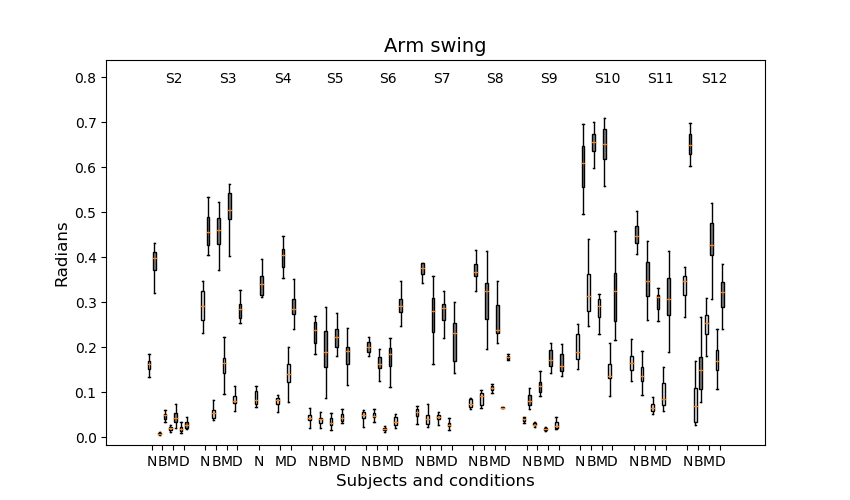

In [10]:
leftArmSwingInt = db.apply_to_all_trials(
                    db.range_decorator(db.get_rotation), 
                                                {'imu':"LH", 
                                                 'startTime':3*60, 
                                                 'anTime':20})
db.make_boxplot([leftArmSwing, leftArmSwingInt], "Arm swing", ylabel=r"Radians")

-----------------------------------------
Applying function to subject S10
Applying to trial B
Applying to trial D
Applying to trial M
Applying to trial N
Applying to trial standingReference
Exception occurred! Check data. Proceeding...
-----------------------------------------
-----------------------------------------
Applying function to subject S11
Applying to trial B
Applying to trial D
Applying to trial M
Applying to trial N
Applying to trial standingReference
Exception occurred! Check data. Proceeding...
-----------------------------------------
-----------------------------------------
Applying function to subject S12
Applying to trial B
Applying to trial D
Applying to trial M
Applying to trial N
Applying to trial standingReference
Exception occurred! Check data. Proceeding...
-----------------------------------------
-----------------------------------------
Applying function to subject S2
Applying to trial B
Applying to trial D
Applying to trial M
Applying to trial N
Applying 

<IPython.core.display.Javascript object>


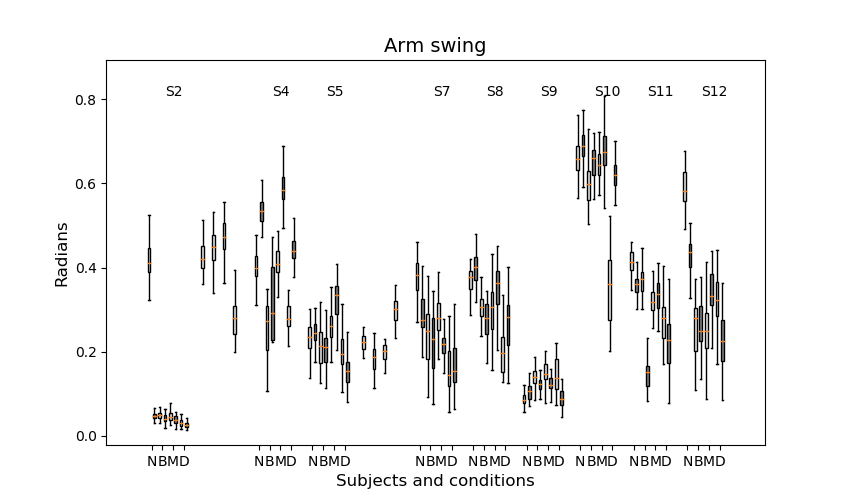

In [12]:
leftArmSwing = db.apply_to_all_trials(
                    db.range_decorator(db.get_rotation), 
                                                {'imu':"LH", 
                                                 'startTime':2*60, 
                                                 'anTime':60})
rightArmSwing = db.apply_to_all_trials(
                    db.range_decorator(db.get_rotation), 
                                                {'imu':"RH", 
                                                 'startTime':2*60, 
                                                 'anTime':60})
db.make_boxplot([leftArmSwing, rightArmSwing], "Arm swing", ylabel=r"Radians")

In [6]:
db.close()

In [ ]:
db.make_boxplot([leftArmSwingMarkers, leftArmSwing], "Arm swing, validation", 
                ylabel=r"Radians", ylim=(0, 1.4))

## Sagittal movement of the trunk

In [ ]:
sagmov = db.apply_to_all_trials(
                    db.range_decorator(db.get_angle_to_vertical), 
                                                {'imu':"N", 
                                                 'startTime':3*60, 
                                                 'anTime':60,
                                                 'doPlots':True})
db.make_boxplot(sagmov, "Sagittal RoM of the trunk", ylabel=r"Radians")

In [ ]:
stats = db.descriptive_statistics(sagmov)
db.test_difference_in_condition(stats, "Sagittal RoM of the trunk, comparisons to N",
                               ylabel="Radians")
db.save_statistics(stats, "Sagittal RoM of the trunk")

In [ ]:
sagmovMarkers = db.apply_to_all_trials(
                    db.range_decorator(db.get_angle_to_vertical_markers), 
                                                {'imu':"N", 
                                                 'startTime':3*60, 
                                                 'anTime':60})

In [ ]:
db.make_boxplot([sagmovMarkers, sagmov], 
                "Sagittal range of movement of the trunk, validation", 
                ylabel=r"Radians", ylim=(0., 0.19))

In [ ]:
db.close()

In [ ]:
stats = db.descriptive_statistics(sagmovMarkers)
db.save_statistics(stats, "Sagittal range of movement of the trunk from markers")

## Vertical displacement of CoM - approximated as vertical displacement of sacrum

In [ ]:
vdisp = db.apply_to_all_trials(
                    db.range_decorator(db.get_vertical_displacement), 
                                                {'imu':"B", 
                                                 'startTime':3*60, 
                                                 'anTime':60,
                                                 'doPlots':False})
db.make_boxplot(vdisp, "Vertical displacement of CoM", ylabel=r"m")

In [ ]:
stats = db.descriptive_statistics(vdisp)
db.test_difference_in_condition(stats, "Vertical displacement of CoM, " + 
                                "comparison to N", 
                                   ylabel="m")
db.save_statistics(stats, "Vertical displacement of CoM")

In [ ]:
vdispMarkers = db.apply_to_all_trials(
                    db.range_decorator(db.get_vertical_displacement_markers), 
                                                {'imu':"B", 
                                                 'startTime':2*60, 
                                                 'anTime':60,
                                                 'doPlots':False})
db.make_boxplot(vdispMarkers, "Vertical displacement from markers", ylabel=r"m")
stats = db.descriptive_statistics(vdispMarkers)
db.save_statistics(stats, "Vertical displacement from markers")
db.make_boxplot([vdispMarkers, vdisp], 'Vertical displacement, validation', ylabel='m')

## Foot clearance - vertical displacement of ankle

In [ ]:
leftFootClearance = db.apply_to_all_trials(
                    db.range_decorator(db.get_vertical_displacement), 
                                                {'imu':"LA", 
                                                 'startTime':3*60, 
                                                 'anTime':60,
                                                 'doPlots':False})
db.make_boxplot(leftFootClearance, "Left foot clearance", ylabel=r"m")
stats = db.descriptive_statistics(leftFootClearance)
db.test_difference_in_condition(stats, "Left foot clearance, " + 
                                "comparison to N", 
                                   ylabel="m")
db.save_statistics(stats, "Left foot clearance")

In [ ]:
rightFootClearance = db.apply_to_all_trials(
                    db.range_decorator(db.get_vertical_displacement), 
                                                {'imu':"RA", 
                                                 'startTime':3*60, 
                                                 'anTime':60,
                                                 'doPlots':False})
db.make_boxplot(rightFootClearance, "Right foot clearance", ylabel=r"m")
stats = db.descriptive_statistics(rightFootClearance)
db.test_difference_in_condition(stats, "Right foot clearance, " + 
                                "comparison to N", 
                                   ylabel="m")
db.save_statistics(stats, "Right foot clearance")

In [ ]:
leftFootClearanceMarkers = db.apply_to_all_trials(
                    db.range_decorator(db.get_vertical_displacement_markers), 
                                                {'imu':"LA", 
                                                 'startTime':3*60, 
                                                 'anTime':60,
                                                 'doPlots':False})
db.make_boxplot(leftFootClearanceMarkers, "Left foot clearance from markers", 
                ylabel=r"m")
stats = db.descriptive_statistics(leftFootClearanceMarkers)
db.save_statistics(stats, "Left foot clearance from markers")

db.make_boxplot([leftFootClearanceMarkers, leftFootClearance], 
                "Left foot clearance, validation", ylim=(0.12, 0.22), ylabel="m")

In [ ]:
db.make_boxplot([leftFootClearance, rightFootClearance], 
                "Foot clearance, left and right", ylim=(0.12, 0.22), ylabel="m")

## Step frequencies and variability

In [ ]:
res = db.apply_to_all_trials(db.get_cycle_frequency, 
                                                {'startTime':3*60, 'anTime':120,
                                                 'doPlots':False})

In [ ]:
db.make_boxplot(res, "Cycle frequency", ylabel=r"Hz")

In [ ]:
stats = db.descriptive_statistics(res)
db.test_difference_in_condition(stats, "Cycle frequency comparisons", ylabel="Hz")
# Test change in variability using interquartile distance
db.test_difference_in_condition(stats, "Cycle frequency variability comparisons", 
                                compare_fcn = lambda x: x[5]-x[3], ylabel="Hz")
db.save_statistics(stats, "Cycle frequency")

In [ ]:
pdb.pm()

## Range of motion in the knee joint

In [ ]:
leftKneeROM = db.apply_to_all_trials(db.range_decorator(db.get_angle_between_segments), 
                                                {'imus':["LA", "LT"], 
                                                 'startTime':3*60, 
                                                 'anTime':60,
                                                 'doPlots':False})


In [ ]:
#db.make_boxplot(leftKneeROM, "Left knee RoM", ylabel=r"Radians")

In [ ]:
stats = db.descriptive_statistics(leftKneeROM)
db.save_statistics(stats, "Left knee RoM")

In [ ]:
rightKneeROM = db.apply_to_all_trials(db.range_decorator(db.get_angle_between_segments), 
                                                {'imus':["RA", "RT"], 
                                                 'startTime':3*60, 
                                                 'anTime':60,
                                                 'doPlots':False})
db.make_boxplot([leftKneeROM, rightKneeROM], "Knee angle RoM", ylabel=r"Radians")
stats = db.descriptive_statistics(rightKneeROM)
db.save_statistics(stats, "Right knee RoM")

In [ ]:
leftKneeROMMarkers = db.apply_to_all_trials(db.range_decorator(
                        db.get_angle_between_segments_markers), 
                                                {'imus':["LA", "LT"], 
                                                 'startTime':3*60, 
                                                 'anTime':60,
                                                 'doPlots':False})
db.make_boxplot([leftKneeROMMarkers, leftKneeROM], 
                "Left knee RoM markers", ylabel=r"Radians")
stats = db.descriptive_statistics(leftKneeROMMarkers)
db.save_statistics(stats, "Left knee RoM Markers")

In [ ]:
pdb.pm()

# Code for fixing various stuff

## Load database in read/write mode

In [ ]:
#db.close()
import pdb
dbfilename = "/home/kjartan/Dropbox/Public/nvg201209.hdf5"
db = ximudata.NVGData(dbfilename, mode='r+', debug=True);

## Fix standing reference where missing

In [ ]:
db.set_standing_reference()

In [ ]:
db._pick_standing_reference("S12", "N")

In [ ]:
db.close()

In [ ]:
absimu = db.get_angle_between_segments(subject="S7", trial="D", 
                                               imus=["LA", "LT"], anTime=40)

In [ ]:
db.fix_cycle_events("S4", "D", k=1.)
db.fix_cycle_events("S4", "B", k=1.)

In [ ]:
pdb.pm()

In [ ]:
db.close()

In [ ]:
vdmark = db.get_vertical_displacement_markers(subject="S4", trial="N", imu="N", 
                                              anTime=20, doPlots=True)
vd = db.get_vertical_displacement(subject="S4", trial="N", imu="B", 
                                              anTime=20, doPlots=True)


In [ ]:
vdrangefcn = db.range_decorator(db.get_vertical_displacement)
vdisp = vdrangefcn('S4', 'B', imu='B', anTime=40)

#                                                {'imu':'B', 'anTime':40},
#                                           subjlist=['S4', 'S6'], triallist=['B', 'N'])

In [ ]:
res = db.apply_to_all_trials(db.range_decorator(db.get_vertical_displacement_markers), 
                                                {'imu':'LA', 'anTime':40},
                                           subjlist=['S4', 'S6'], triallist=['D', 'N'])

In [ ]:
db.make_boxplot(res, "Vertical displacement of imu LA")

In [ ]:
mdta = db.get_marker_data(subject="S4", trial="D", startTime=120, anTime=20)

In [ ]:
pdb.pm()

In [ ]:
imudta = db.get_imu_data(subject="S4", trial="D", imu="LA", startTime=120, anTime=20,
                        SIUnits=True)

In [ ]:
print "Imu data from %f to %f  DeltaT=%f" % (imudta[0][0,-1], imudta[0][-1, -1],
                                             imudta[0][-1, -1]-imudta[0][0, -1])
print "Marker data from %f to %f  DeltaT=%f" % (mdta['frames'][0], mdta['frames'][-1],
                                             mdta['frames'][-1]-mdta['frames'][0])

In [ ]:
pdb.pm()

In [ ]:
#absmark = db.get_angle_between_segments_markers(subject="S4", trial="D", 
#                                               imus=["LA", "LT"], anTime=20)
absimu = db.get_angle_between_segments(subject="S7", trial="D", 
                                               imus=["LA", "LT"], anTime=40)

In [ ]:
a2vm = db.get_angle_to_vertical_markers(subject="S4", trial="D", imu="LA", anTime=30, 
                                       sagittalDir=[-1.0, 0, 0])
a2vm = db.get_angle_to_vertical_markers(subject="S4", trial="D", imu="LA", anTime=30, 
                                       sagittalDir=None)
a2vm = db.get_angle_to_vertical(subject="S4", trial="D", imu="LA", anTime=30)

In [ ]:
db.rotationEstimator

In [ ]:
pdb.pm()

In [ ]:
[imudta, s_, tr_] = db.get_imu_data(subject="S4", trial="D", imu="LT",
                                            anTime=30, split=True,
                                            SIUnits=True)
        

In [ ]:
acc = imudta[10][:,4:7]

In [ ]:
plt.figure()
plt.plot(acc)

In [ ]:
db.close()

In [ ]:
md = db.get_marker_data(subject="S4", trial="N", markers=["WRIST"], startTime=60, anTime=40)


In [ ]:
md

In [ ]:
plt.figure()
plt.subplot(3,1,1)
plt.plot(md["WRIST"][:,0])
plt.plot(md["ANKLE"][:,0])
plt.subplot(3,1,2)
plt.plot(md["WRIST"][:,1])
plt.plot(md["ANKLE"][:,1])
plt.subplot(3,1,3)
plt.plot(md["WRIST"][:,2])
plt.plot(md["ANKLE"][:,2])


In [ ]:
res = db.apply_to_all_trials(db.get_RoM_angle_to_vertical, {'imu':'LH'},
                                           subjlist=['S4', 'S6'], triallist=['B', 'N'])

In [ ]:
res = db.apply_to_all_trials(db.get_angle_to_vertical_markers, {'imu':'LH'},
                                           subjlist=['S4', 'S6'], triallist=['B', 'N'])

In [ ]:
db.track_displacement(imu="LH")

In [ ]:
s = "hejsan-.pdf"

In [ ]:
s[:-5] + s[-4:]

In [ ]:
a = np.random.rand(10,4)
fig= plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)
bp=ax.boxplot(a, patch_artist=True)
boxes = bp['boxes']
plt.show()

In [ ]:
box = boxes[0]
?box

In [ ]:
box.set_fillstyle('full')
box.set_color('0.8')
dir(box)

In [ ]:
import matplotlib

In [ ]:
matplotlib.__version__

In [ ]:
a = np.arange(8)

In [ ]:
np.take(a, [1,4])

In [ ]:
import functools
fcn = lambda x: x[2]-x[0]

In [ ]:
fcn([1,2,3,4])